In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
from tqdm import tqdm
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
TESS = "/home/avinashchavan/Desktop/finalproject/data_store/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/home/avinashchavan/Desktop/finalproject/data_store/RAVDESS/audio_speech_actors_01-24/"
SAVEE = "/home/avinashchavan/Desktop/finalproject/data_store/SAVEE/ALL/"
CREMA = "/home/avinashchavan/Desktop/finalproject/data_store/AudioWAV/"
RAVSONG = "/home/avinashchavan/Desktop/finalproject/data_store/RAVDESS_song/"

# Run one example 
dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_17', 'Actor_19', 'Actor_21', 'Actor_09', 'Actor_02']

### CREMA Dataset

In [3]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [4]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
from tqdm import tqdm
for i in tqdm(dir_list): 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

100%|██████████| 7442/7442 [00:00<00:00, 305152.12it/s]


male_disgust      671
male_sad          671
male_happy        671
male_angry        671
male_fear         671
female_fear       600
female_happy      600
female_sad        600
female_angry      600
female_disgust    600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

### RAVDEES dataset

In [3]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in tqdm(dir_list):
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

100%|██████████| 24/24 [00:00<00:00, 1943.57it/s]


calm        192
surprise    192
fear        192
happy       192
disgust     192
angry       192
sad         192
neutral      96
Name: labels, dtype: int64

### TESS dataset

In [6]:
dir_list = os.listdir(TESS)
dir_list.sort()
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_surprise    400
female_happy       400
female_fear        400
female_sad         400
female_neutral     400
female_angry       400
female_disgust     400
Name: labels, dtype: int64

In [4]:
#RAV SONG
dir_list = os.listdir(RAVSONG)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAVSONG + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVSONG + i + '/' + f)

        
RAV_dfs = pd.DataFrame(emotion)
RAV_dfs = RAV_dfs.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_dfs = pd.concat([pd.DataFrame(gender),RAV_dfs],axis=1)
RAV_dfs.columns = ['gender','emotion']
RAV_dfs['labels'] = RAV_dfs.emotion
RAV_dfs['source'] = 'RAVDESS'  
RAV_dfs = pd.concat([RAV_dfs,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_dfs = RAV_dfs.drop(['gender', 'emotion'], axis=1)
RAV_dfs.labels.value_counts()

fear       184
calm       184
happy      184
angry      184
sad        184
neutral     92
Name: labels, dtype: int64

### SAVEE dataset

In [7]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_happy        60
male_angry        60
male_disgust      60
male_fear         60
male_surprise     60
Name: labels, dtype: int64

In [46]:
#df = pd.concat([ RAV_df, TESS_df, CREMA_df], axis = 0)
df = pd.concat([ RAV_df, RAV_dfs,RAV_df[:400]], axis = 0)

print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

sad         430
calm        430
happy       430
fear        429
angry       429
surprise    245
disgust     245
neutral     214
Name: labels, dtype: int64


In [47]:
df

,labels,source,path
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
...,...,...,...
395,angry,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
396,angry,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
397,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
398,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...


## BASELINE modelling

In [48]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

,labels,source,path
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...


In [49]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over # datasets 
df = pd.DataFrame(columns=['feature'])

counter=0
for path in tqdm(ref['path']):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=40).T,
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

print(len(df))
df.head()


100%|██████████| 2852/2852 [02:48<00:00, 16.88it/s]

2852


,feature
0,"[-453.6828, 102.18169, -17.33223, 15.077891, -..."
1,"[-677.1172, 87.63012, 3.9732516, 15.096436, 8...."
2,"[-591.8604, 90.644295, 0.46863782, 22.506477, ..."
3,"[-584.8962, 100.30739, -6.7034307, 17.183643, ..."
4,"[-560.8615, 92.91066, -1.0843737, 15.238631, -..."


In [50]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-453.682800,102.181686,-17.332230,15.077891,-3.144119,13.175822,-14.024340,...,-5.439161,-6.471412,-5.984719,-3.303055,-7.607924,-3.285888,0.026597,-2.393561,1.913962,1.769395
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-677.117188,87.630119,3.973252,15.096436,8.129905,16.422251,-5.018029,...,-0.382024,-4.446791,-1.332099,-0.281551,-1.376313,0.000013,-1.299730,-2.325293,-2.219566,-1.663283
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-591.860413,90.644295,0.468638,22.506477,6.942158,18.488306,-7.732348,...,-1.650141,-3.239360,-2.909358,-0.326658,-3.508025,-1.382740,-1.867330,-2.272516,-2.195575,-2.896178
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-584.896179,100.307388,-6.703431,17.183643,4.139813,15.646654,-11.627791,...,-2.903142,-3.679712,-5.593213,-1.709895,-3.457834,-1.784106,-2.758051,-4.062043,-3.558861,-3.107982
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-560.861511,92.910660,-1.084374,15.238631,-7.650074,19.007704,-13.566956,...,-2.517837,-4.961462,-2.115119,-0.894658,-1.417710,-0.112617,-1.404444,-1.333170,-0.295669,-2.889107


In [51]:
df=df.fillna(0)
print(df.shape)
df[:5]

(2852, 43)


,labels,source,path,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-453.682800,102.181686,-17.332230,15.077891,-3.144119,13.175822,-14.024340,...,-5.439161,-6.471412,-5.984719,-3.303055,-7.607924,-3.285888,0.026597,-2.393561,1.913962,1.769395
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-677.117188,87.630119,3.973252,15.096436,8.129905,16.422251,-5.018029,...,-0.382024,-4.446791,-1.332099,-0.281551,-1.376313,0.000013,-1.299730,-2.325293,-2.219566,-1.663283
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-591.860413,90.644295,0.468638,22.506477,6.942158,18.488306,-7.732348,...,-1.650141,-3.239360,-2.909358,-0.326658,-3.508025,-1.382740,-1.867330,-2.272516,-2.195575,-2.896178
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-584.896179,100.307388,-6.703431,17.183643,4.139813,15.646654,-11.627791,...,-2.903142,-3.679712,-5.593213,-1.709895,-3.457834,-1.784106,-2.758051,-4.062043,-3.558861,-3.107982
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-560.861511,92.910660,-1.084374,15.238631,-7.650074,19.007704,-13.566956,...,-2.517837,-4.961462,-2.115119,-0.894658,-1.417710,-0.112617,-1.404444,-1.333170,-0.295669,-2.889107


In [52]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import rmsprop

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd

In [53]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1539,-473.563751,113.667572,-39.748138,16.220613,3.799848,4.952380,-17.207375,-13.188076,-24.096418,-11.566232,...,-6.337113,-4.234697,-5.045637,-4.482439,-5.920661,-8.959111,-3.630237,-5.029400,-5.725232,-4.440977
49,-366.794922,81.409615,-21.368986,3.970252,-9.632194,13.028951,-13.744287,-1.596427,-17.926868,-13.725868,...,7.554018,5.370227,1.409131,4.436237,2.792488,3.866875,8.436067,4.831153,2.693566,0.482988
1967,-540.624695,73.499886,-36.030231,10.250334,-12.303969,-0.353857,-23.342714,-8.105033,-18.191786,-16.140749,...,2.781411,2.934392,2.252730,-3.142648,-4.886099,-5.196668,-2.946555,0.958499,-0.774039,-2.954776
1750,-482.372620,64.450760,-42.018806,4.113906,-4.306509,-0.199955,-35.663204,1.772153,-16.528475,-18.453154,...,1.060603,6.598987,3.747113,-1.027564,-3.997554,-1.923825,4.505233,10.205270,7.577851,-0.293070
811,-563.650452,56.406284,-16.819546,8.000503,-4.626719,-0.308217,-22.620981,-5.065800,-23.664017,-2.560637,...,2.029250,0.631538,-1.059821,0.526811,-0.616936,-2.327264,-0.453632,-1.291499,1.020379,0.191496
48,-616.433716,117.469124,-0.510325,23.820265,6.571546,21.892918,-8.265841,12.081756,-17.712908,1.022997,...,-1.410461,-4.417169,-0.939643,-1.367659,-2.490387,-1.873486,-3.676750,-3.747354,-3.390698,-2.812832
719,-617.493713,88.543228,-7.949417,13.663110,-4.356188,15.914577,-18.397663,2.564821,-17.461205,-9.242778,...,-2.429452,-5.040052,-1.182010,-2.937462,-2.967873,3.297158,2.624813,5.353373,7.011341,6.648593
2709,-700.540100,102.141205,-3.722561,49.506004,3.214958,17.348013,-10.239436,11.679287,-10.351259,1.523792,...,1.750721,-3.932431,0.537816,0.406064,-2.952774,-3.491944,-3.337701,0.310159,-3.349656,-1.512424
1793,-425.136719,123.868523,-31.346788,7.267849,15.485596,28.373222,-36.036579,-9.734681,-2.240526,-2.456633,...,-4.038804,-3.291129,-5.057058,-3.107547,-2.709288,-1.588540,1.077145,2.783870,-1.091857,-2.255896
2131,-524.603638,54.636936,-11.440147,13.861724,-8.555665,5.589410,-32.817459,-7.780079,-19.938341,-8.217552,...,-2.434746,-2.528345,-0.544449,-3.383538,-10.183885,-2.791003,1.250603,4.024060,0.700344,-6.961059


In [54]:
# data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1539,0.519754,1.291510,-1.249407,0.297577,0.725150,-0.302596,0.136695,-1.968320,-1.400835,-0.493805,...,-1.524316,-0.808000,-1.258097,-1.282294,-1.182575,-2.336194,-1.378410,-1.825854,-2.424976,-1.693288
49,1.554992,-0.326121,-0.201136,-0.941971,-0.707336,0.521802,0.521582,-0.242674,-0.469922,-0.805747,...,2.438964,1.687078,0.607844,1.572909,1.117705,1.317576,2.507278,1.091993,0.287925,-0.004570
1967,-0.130473,-0.722768,-1.037353,-0.306523,-0.992272,-0.844218,-0.545186,-1.211609,-0.509895,-1.154556,...,1.077291,1.054320,0.851711,-0.853377,-0.909450,-1.264378,-1.158245,-0.053968,-0.829488,-1.183582
1750,0.434343,-1.176552,-1.378917,-0.927435,-0.139368,-0.828509,-1.914483,0.258806,-0.258921,-1.488564,...,0.586327,2.006274,1.283706,-0.176259,-0.674873,-0.332035,1.241440,2.682255,1.861853,-0.270726
811,-0.353732,-1.579956,0.058346,-0.534171,-0.173518,-0.839559,-0.464972,-0.759159,-1.335590,0.806980,...,0.862692,0.456105,-0.105880,0.321355,0.217614,-0.446964,-0.355454,-0.719768,-0.251249,-0.104540
48,-0.865522,1.482145,0.988557,1.066545,1.020743,1.426572,1.130456,1.793595,-0.437638,1.324606,...,-0.118692,-0.855401,-0.071139,-0.285136,-0.276979,-0.317695,-1.393389,-1.446483,-1.672689,-1.134900
719,-0.875800,0.031606,0.564261,0.038797,-0.144666,0.816346,0.004407,0.376810,-0.399659,-0.158201,...,-0.409421,-1.017208,-0.141202,-0.787689,-0.403036,1.155280,0.635892,1.246524,1.679299,2.109980
2709,-1.681023,0.713500,0.805344,3.665547,0.662773,0.962661,0.911111,1.733679,0.673148,1.396942,...,0.783225,-0.729480,0.355965,0.282699,-0.399050,-0.778749,-1.284205,-0.245819,-1.659463,-0.688914
1793,0.989306,1.803054,-0.770229,-0.608305,1.971398,2.088034,-1.955980,-1.454214,1.896962,0.822002,...,-0.868585,-0.562889,-1.261399,-0.842140,-0.334769,-0.236521,0.137499,0.486180,-0.931902,-0.943894
2131,0.024868,-1.668683,0.365164,0.058894,-0.592527,-0.237572,-1.598207,-1.163233,-0.773430,-0.010115,...,-0.410931,-0.364740,0.043104,-0.930495,-2.308071,-0.579070,0.193358,0.853166,-0.354378,-2.557572


In [55]:
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1539,0.090423,0.270120,-0.160388,0.069783,0.167380,-0.043225,0.028666,-0.233616,-0.199277,-0.048960,...,-0.284163,-0.255699,-0.281176,-0.255375,-0.252241,-0.346460,-0.249690,-0.275221,-0.441684,-0.309168
49,0.276516,-0.009537,0.031379,-0.079904,-0.064487,0.110728,0.094083,0.031710,-0.061859,-0.095304,...,0.106507,0.081030,-0.018186,0.118572,0.090101,0.113272,0.269031,0.122186,-0.075403,-0.092376
1967,-0.026462,-0.078110,-0.121596,-0.003168,-0.110608,-0.144370,-0.087229,-0.117268,-0.067760,-0.147125,...,-0.027717,-0.004365,0.016185,-0.199200,-0.211593,-0.211600,-0.220299,-0.033892,-0.226270,-0.243734
1750,0.075069,-0.156561,-0.184080,-0.078149,0.027446,-0.141436,-0.319960,0.108815,-0.030712,-0.196747,...,-0.076112,0.124108,0.077072,-0.110517,-0.176682,-0.094289,0.100047,0.338778,0.137100,-0.126544
811,-0.066594,-0.226301,0.078847,-0.030659,0.021919,-0.143500,-0.073595,-0.047702,-0.189646,0.144292,...,-0.048870,-0.085099,-0.118780,-0.045345,-0.043856,-0.108750,-0.113130,-0.124573,-0.148200,-0.105209
48,-0.158593,0.303078,0.249016,0.162643,0.215226,0.279689,0.197570,0.344796,-0.057093,0.221194,...,-0.145607,-0.262096,-0.113883,-0.124777,-0.117465,-0.092484,-0.251690,-0.223551,-0.340114,-0.237484
719,-0.160441,0.052307,0.171398,0.038533,0.026589,0.165732,0.006182,0.126959,-0.051487,0.000899,...,-0.174265,-0.283933,-0.123758,-0.190596,-0.136225,0.092851,0.019210,0.143233,0.112452,0.179084
2709,-0.305187,0.170193,0.215500,0.476498,0.157284,0.193056,0.160289,0.335584,0.106877,0.231940,...,-0.056703,-0.245102,-0.053687,-0.050407,-0.135632,-0.150496,-0.237114,-0.060022,-0.338329,-0.180230
1793,0.174829,0.358557,-0.072729,-0.039611,0.369103,0.403213,-0.327013,-0.154570,0.287531,0.146524,...,-0.219526,-0.222619,-0.281641,-0.197728,-0.126065,-0.082271,-0.047323,0.039675,-0.240098,-0.212963
2131,0.001462,-0.241641,0.134976,0.040960,-0.045904,-0.031082,-0.266205,-0.109830,-0.106662,0.022900,...,-0.174414,-0.195878,-0.097782,-0.209300,-0.419744,-0.125372,-0.039867,0.089658,-0.162123,-0.420123


In [56]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(2281, 40)
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [57]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(2281, 40, 1)

In [58]:
model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [59]:
# model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test),
                        shuffle = True)

Train on 2281 samples, validate on 571 samples
Epoch 1/100
2281/2281 [==============================] - 9s 4ms/step - loss: 2.0623 - accuracy: 0.1543 - val_loss: 2.0312 - val_accuracy: 0.1681
Epoch 2/100
2281/2281 [==============================] - 6s 3ms/step - loss: 2.0319 - accuracy: 0.1811 - val_loss: 1.9864 - val_accuracy: 0.2084
Epoch 3/100
2281/2281 [==============================] - 7s 3ms/step - loss: 1.9856 - accuracy: 0.1793 - val_loss: 1.9292 - val_accuracy: 0.2189
Epoch 4/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.9506 - accuracy: 0.1964 - val_loss: 1.8464 - val_accuracy: 0.2487
Epoch 5/100
2281/2281 [==============================] - 7s 3ms/step - loss: 1.8864 - accuracy: 0.2297 - val_loss: 1.7758 - val_accuracy: 0.2644
Epoch 6/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.8341 - accuracy: 0.2591 - val_loss: 1.7429 - val_accuracy: 0.3030
Epoch 7/100
2281/2281 [==============================] - 7s 3ms/step - loss: 1.7771

Epoch 57/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.1921 - accuracy: 0.5401 - val_loss: 1.4127 - val_accuracy: 0.4939
Epoch 58/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.1834 - accuracy: 0.5568 - val_loss: 1.5866 - val_accuracy: 0.4764
Epoch 59/100
2281/2281 [==============================] - 6s 2ms/step - loss: 1.1858 - accuracy: 0.5467 - val_loss: 1.4009 - val_accuracy: 0.5026
Epoch 60/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.1753 - accuracy: 0.5559 - val_loss: 1.4854 - val_accuracy: 0.4746
Epoch 61/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.1635 - accuracy: 0.5572 - val_loss: 1.5496 - val_accuracy: 0.4676
Epoch 62/100
2281/2281 [==============================] - 6s 2ms/step - loss: 1.1771 - accuracy: 0.5590 - val_loss: 1.4352 - val_accuracy: 0.4904
Epoch 63/100
2281/2281 [==============================] - 6s 3ms/step - loss: 1.1392 - accuracy: 0.5638 - val_loss: 1.3911 -

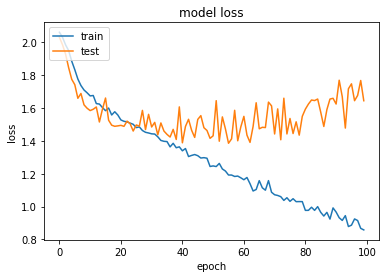

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# Save model and weights
model_name = 'Emotion_Model_LSTM.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/avinashchavan/Desktop/finalproject/saved_models/Emotion_Model_LSTM.h5 


In [62]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_LSTM.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 53.77%


In [63]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

571/571 [==============================] - 0s 742us/step


array([3, 7, 3, 1, 4, 5, 6, 1, 4, 6, 6, 3, 5, 3, 1, 0, 6, 3, 6, 1, 0, 3,
       4, 6, 1, 5, 6, 4, 1, 4, 1, 7, 7, 1, 3, 6, 1, 1, 0, 2, 1, 3, 7, 4,
       6, 4, 1, 7, 1, 1, 3, 3, 5, 2, 3, 6, 3, 6, 7, 7, 6, 1, 3, 6, 1, 1,
       6, 7, 6, 4, 5, 5, 1, 1, 0, 6, 6, 5, 1, 4, 7, 4, 0, 7, 6, 6, 6, 0,
       1, 4, 3, 1, 5, 5, 4, 1, 1, 3, 4, 2, 2, 3, 1, 1, 0, 1, 3, 1, 6, 3,
       6, 1, 7, 1, 4, 6, 3, 1, 2, 6, 7, 6, 1, 4, 1, 3, 1, 6, 4, 7, 2, 5,
       7, 4, 1, 3, 4, 3, 3, 4, 6, 6, 0, 1, 1, 3, 6, 1, 4, 2, 6, 7, 6, 1,
       6, 5, 0, 1, 5, 6, 3, 3, 2, 1, 5, 1, 6, 6, 5, 3, 1, 1, 6, 3, 1, 6,
       6, 6, 1, 7, 3, 3, 7, 2, 6, 1, 1, 4, 1, 7, 4, 7, 7, 7, 4, 3, 5, 3,
       0, 6, 4, 6, 1, 6, 3, 5, 4, 1, 4, 3, 6, 6, 1, 1, 7, 1, 6, 1, 2, 1,
       7, 1, 0, 4, 3, 7, 1, 3, 0, 0, 1, 6, 3, 2, 6, 7, 3, 3, 1, 0, 5, 3,
       3, 1, 1, 1, 1, 5, 6, 5, 5, 1, 6, 2, 2, 5, 5, 4, 6, 6, 0, 6, 5, 1,
       6, 5, 2, 3, 1, 0, 3, 7, 2, 5, 5, 4, 4, 1, 7, 1, 6, 1, 0, 5, 4, 6,
       4, 3, 0, 1, 6, 3, 1, 6, 6, 6, 6, 2, 6, 1, 7,

In [64]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,calm,calm
171,calm,calm
172,happy,sad
173,fear,fear
174,happy,calm
175,sad,sad
176,sad,sad
177,fear,sad
178,calm,calm
179,surprise,surprise


In [65]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,46
calm,140
disgust,32
fear,90
happy,67
neutral,49
sad,90
surprise,57


In [66]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
#     """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
#     Arguments
#     ---------
#     confusion_matrix: numpy.ndarray
#         The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
#         Similarly constructed ndarrays can also be used.
#     class_names: list
#         An ordered list of class names, in the order they index the given confusion matrix.
#     figsize: tuple
#         A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
#         the second determining the vertical size. Defaults to (10,7).
#     fontsize: int
#         Font size for axes labels. Defaults to 14.
        
#     Returns
#     -------
#     matplotlib.figure.Figure
#         The resulting confusion matrix figure
#     """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.5376532399299475


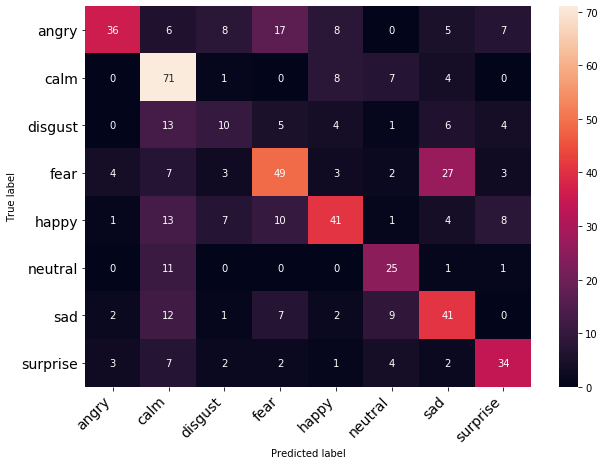

In [67]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [68]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.78      0.41      0.54        87
        calm       0.51      0.78      0.61        91
     disgust       0.31      0.23      0.27        43
        fear       0.54      0.50      0.52        98
       happy       0.61      0.48      0.54        85
     neutral       0.51      0.66      0.57        38
         sad       0.46      0.55      0.50        74
    surprise       0.60      0.62      0.61        55

    accuracy                           0.54       571
   macro avg       0.54      0.53      0.52       571
weighted avg       0.56      0.54      0.53       571



0.7338003502626971


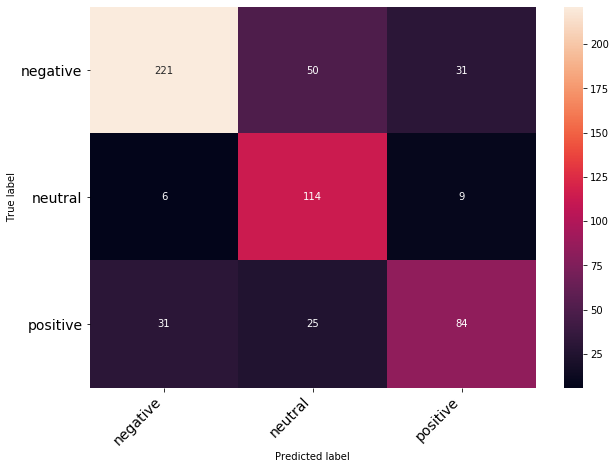

In [69]:

modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'angry':'negative'
                                       , 'disgust':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                        ,'calm':'neutral'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'angry':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'disgust':'negative'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'angry':'negative'
                                       , 'disgust':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       ,'calm':'neutral'                     
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'angry':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'disgust':'negative'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [70]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

    negative       0.86      0.73      0.79       302
     neutral       0.60      0.88      0.72       129
    positive       0.68      0.60      0.64       140

    accuracy                           0.73       571
   macro avg       0.71      0.74      0.71       571
weighted avg       0.76      0.73      0.74       571

